# PREDICTING THE CUSTOMERS THAT LIKELY TO PURCHASE A PRODUCT BASE ON CUSTOMER HISTORY

* The data was provided by analyticsvidhya as part of it job-a-thon, which is to produce a model that can predict whether a customer will purchase a product or not base on the consumer history data.

> _WORKFLOW_
>> The the course of the building a machine learning model that can predict whether a customer will buy the product of the organization or not, the following are the different stages of the work before well arrive at the final model
>> Perform exploratory data analysis: Here will try to build an intitutive understanding of the data, the structures etc
>> Feature engineer the data: Here will develop an approach to tackle some defeciency in the data and try to fine tune the data to meet the expectation of the final model
>> Build Model: We will be looking at different machine learning models like logistics regression, xgboost etc and also combine a few to achieve a model with an high ROC score. Also, we will look at hyperparameter tuning for fine tune the hyperparameter of the models.
>
> ***Note:*** Each of these stages have been splitted into it own notebook for easy readability and work through

## EXPLORATORY DATA ANALYSIS
* We will investigate the nature of the data to discover interesting fact. In familarizing ourselvies with the data we will look at feature data type, rate of missing values, basic statistics like mean, standard deviation etc.
* We will use visuals to under some of the distributions and see how it relates with the target variable
* We will make use mostly of the following libraries; ```pandas, numpy, matplotlib, seaborn```
* This we go a long way when we start our feature engineering section

In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-dark")

In [2]:
# Define the path were our data is located in the local director

train_pth = "train_wn75k28.csv" # This data will be used train our model and will be used to derive insight from our data

In [3]:
# Loading our data into jupyter notebook using pandas
df = pd.read_csv(train_pth, index_col="id")
df.head() # Previewing the 5 five rows of the data

,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
id,,,,,,,,,,,,,,,,,,
1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [4]:
# Inspecting the shape of the data
print(f"The data contains {df.shape[0]} rows and {df.shape[1]} columns")

The data contains 39161 rows and 18 columns


In [5]:
# getting general information about the data like feature names, number of non-null in the data and the type of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39161 entries, 1 to 39161
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   created_at            39161 non-null  object 
 1   campaign_var_1        39161 non-null  int64  
 2   campaign_var_2        39161 non-null  int64  
 3   products_purchased    18250 non-null  float64
 4   signup_date           24048 non-null  object 
 5   user_activity_var_1   39161 non-null  int64  
 6   user_activity_var_2   39161 non-null  int64  
 7   user_activity_var_3   39161 non-null  int64  
 8   user_activity_var_4   39161 non-null  int64  
 9   user_activity_var_5   39161 non-null  int64  
 10  user_activity_var_6   39161 non-null  int64  
 11  user_activity_var_7   39161 non-null  int64  
 12  user_activity_var_8   39161 non-null  int64  
 13  user_activity_var_9   39161 non-null  int64  
 14  user_activity_var_10  39161 non-null  int64  
 15  user_activity_var_1

### Observation 1
* Two of the feature(```created_at```, ```signup_date```) doesn't have the correct data type they are indicate as object instead of datetime
* products_purchased and signup_date also contains some unknown values. Below we will investigate further the null value in the dataset
* 53.4% values are missing in the products_purchased columns and 38.59% values are missing as well in the signup_date

In [6]:
df.isna().sum() # Inquiring the number of missing values in the each values

created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [7]:
np.round((df.isna().sum()/df.shape[0])*100, 2) # Representing the missing values as percentage of the overall number of items in the columns

created_at               0.00
campaign_var_1           0.00
campaign_var_2           0.00
products_purchased      53.40
signup_date             38.59
user_activity_var_1      0.00
user_activity_var_2      0.00
user_activity_var_3      0.00
user_activity_var_4      0.00
user_activity_var_5      0.00
user_activity_var_6      0.00
user_activity_var_7      0.00
user_activity_var_8      0.00
user_activity_var_9      0.00
user_activity_var_10     0.00
user_activity_var_11     0.00
user_activity_var_12     0.00
buy                      0.00
dtype: float64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
campaign_var_1,39161.0,6.523812,3.472944,1.0,4.0,6.0,9.0,16.0
campaign_var_2,39161.0,6.452746,2.614296,1.0,5.0,6.0,8.0,15.0
products_purchased,18250.0,2.154137,0.779815,1.0,2.0,2.0,3.0,4.0
user_activity_var_1,39161.0,0.400092,0.509194,0.0,0.0,0.0,1.0,3.0
user_activity_var_2,39161.0,0.006716,0.081676,0.0,0.0,0.0,0.0,1.0
user_activity_var_3,39161.0,0.102832,0.303743,0.0,0.0,0.0,0.0,1.0
user_activity_var_4,39161.0,0.011465,0.106463,0.0,0.0,0.0,0.0,1.0
user_activity_var_5,39161.0,0.151503,0.359681,0.0,0.0,0.0,0.0,2.0
user_activity_var_6,39161.0,0.499834,0.558166,0.0,0.0,0.0,1.0,3.0
user_activity_var_7,39161.0,0.286612,0.455784,0.0,0.0,0.0,1.0,2.0


### Observation 2
* It is obvious from the two histogram one can tell that the campaign doesn't not contribute much or at all to customer buying or not buying the product which means it will be a great idea for to review the reasons that make the campaign not effective or more data could be provided to further help understand the customers needs. It is also important to note that the campaign raises the aware of the product as it increases from 0 and peak at 6 and begins to drop afterwards
* Also for the purpose of modeling it is important to note that the campaign_var_1 is rightly skewed and campaign_var_2 is nearly normally distributed but so symmetrical to the right. It will be good to apply so form of transformation eg log transformation

degree of skewness for campaign var 1:  0.4533799295081014



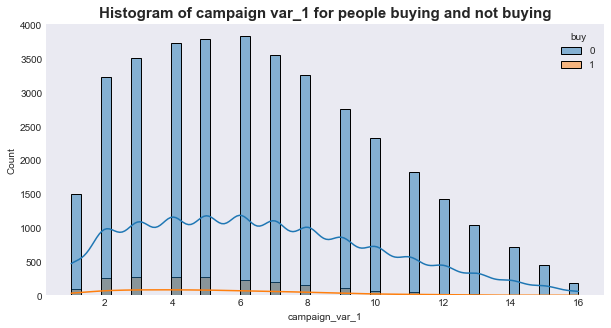

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="campaign_var_1", hue="buy", kde=True)
plt.title("Histogram of campaign var_1 for people buying and not buying", size=15, weight="bold");
print("degree of skewness for campaign var 1: ", df["campaign_var_1"].skew(), end="\n\n")

degree of skewness for campaign var 2:  0.2420951978497998



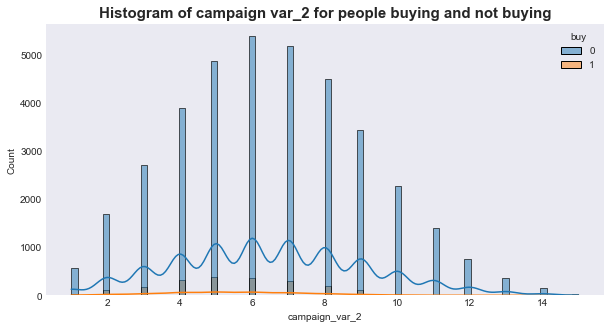

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="campaign_var_2", hue="buy", kde=True)
plt.title("Histogram of campaign var_2 for people buying and not buying", size=15, weight="bold");
print("degree of skewness for campaign var 2: ", df["campaign_var_2"].skew(), end="\n\n")

### Observation 3
* Looking at the histogram for user activity for example the the variable 6 and 11 one can say that the user activity taking individually is less informative hence it would be a good if the user activity is feature engineered eg by aggregating them
* Also the it is observed that more people not buying the product tend to explore the product more compare to people buy the product so it means one need to identify why more people are exploring the product and not buying

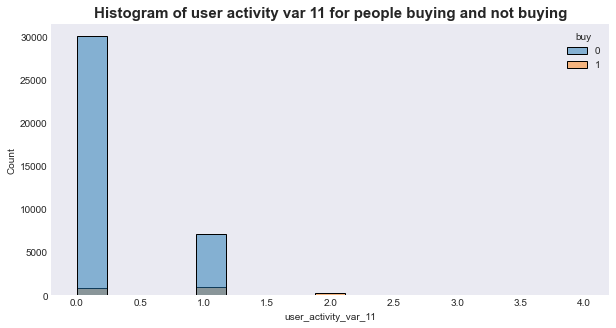

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="user_activity_var_11", hue="buy")
plt.title("Histogram of user activity var 11 for people buying and not buying", size=15, weight="bold");

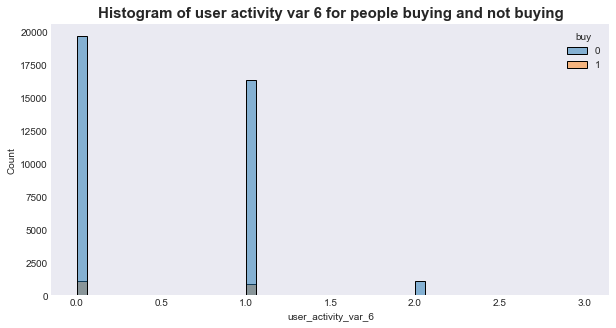

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="user_activity_var_6", hue="buy")
plt.title("Histogram of user activity var 6 for people buying and not buying", size=15, weight="bold");

### Observation 4
* The below section shows that there exist a class imblance in our data as we have more people not buy compared to customers that bought the product this will greatly affect our model hence the need to deal with this class imblance

count of customer buying and not buying product
 0    37163
1     1998
Name: buy, dtype: int64



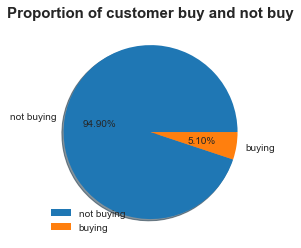

In [13]:
# Checking for class balance
plt.pie(df["buy"].value_counts(normalize=True), labels=[ "not buying", "buying"], 
        shadow=True, autopct="%1.2f%%")
plt.title("Proportion of customer buy and not buy", size=15, weight="bold");
plt.legend(loc="lower left");
print("count of customer buying and not buying product\n", df["buy"].value_counts(), end="\n\n") 

### Observation 5
* The below is a distribution boxplot of the number of product purchased by the customer where majority of people buying ending up buy between item 1 to 3. Quite ironic is the fact the customer that didn't buy also make purchase which is an indication of maybe the customers are not satisfied with the product and must have made a return
* There are four products featured in this data

number of unique products  [ 2.  3. nan  1.  4.]



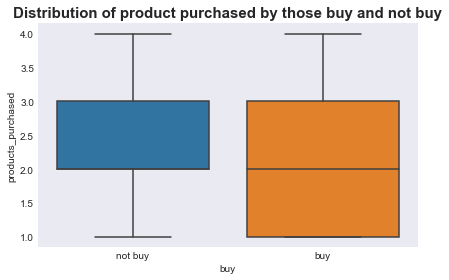

In [14]:
sns.boxplot(x="buy", y="products_purchased", data=df)
plt.title("Distribution of product purchased by those buy and not buy", size=15, weight="bold")
plt.tight_layout()
plt.xticks([1, 0], ["buy", "not buy"]);

print("number of unique products ",df["products_purchased"].unique(), end="\n\n")

### Observation 6
* The charts below will help us gain insight into the relationship between the different feature in our data and from the findings below one can say that there exist a strong relationship between the campaign_var_1 and campaign_var_2 as show in the heatmap in the second graph with R value of 0.59
* It will also be important to attend to the question of collinearity before building our final model

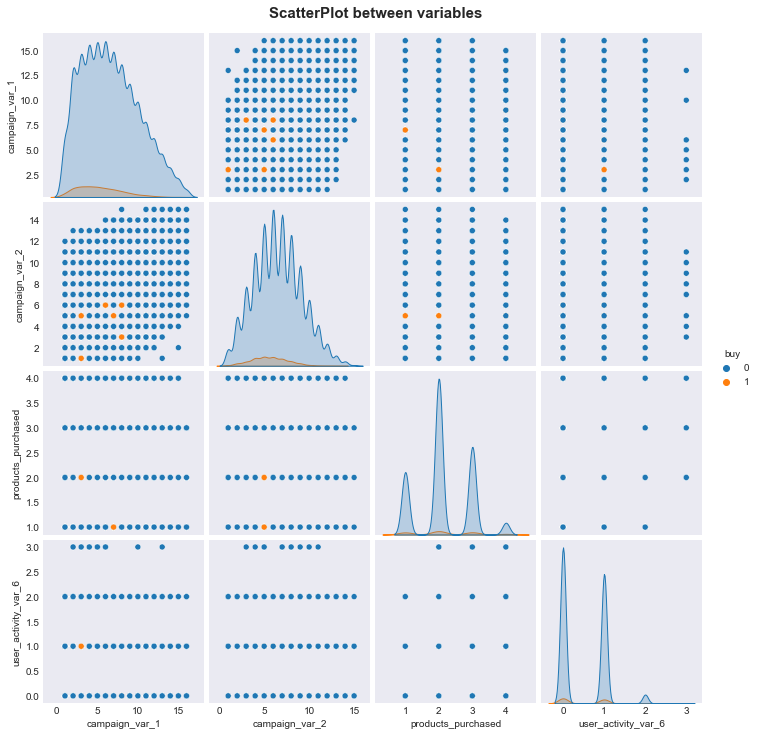

In [15]:
g = sns.pairplot(data=df, hue="buy", vars=["campaign_var_1", "campaign_var_2", "products_purchased", 
                                       "user_activity_var_6"])
g.fig.suptitle("ScatterPlot between variables", size=15, weight="bold", y=1.02);

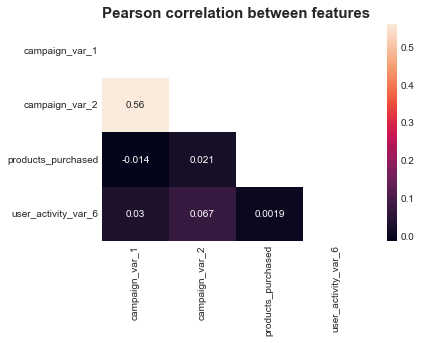

In [16]:
corr = df[["campaign_var_1", "campaign_var_2", "products_purchased", "user_activity_var_6"]].corr()
mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(data=corr, mask=mask, annot=True)
    plt.title("Pearson correlation between features", size=15, weight="bold")

### Observation 7
* In this part we want to have an understanding of the product most customer consider there favorite
* Both bar plot below show that product 2 is the most purchased product while product 4 is less purchased

In [17]:
# Aggregating the counts of each product by whether a product is bought or not
product_count = (df[["buy", "products_purchased"]]
   .groupby(["buy", "products_purchased"])["products_purchased"]
   .count()
   .rename("product count")
   .to_frame()
   .reset_index()
)

product_count.sample(5) # Previewing the product_count

,buy,products_purchased,product count
1,0,2.0,8484
2,0,3.0,4770
7,1,4.0,74
5,1,2.0,383
0,0,1.0,3401


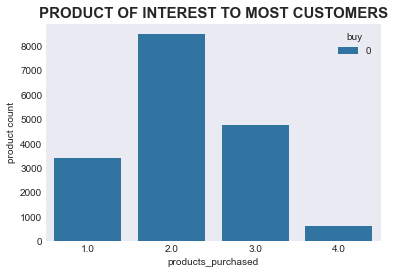

In [18]:
# Visualizing the product count for customers that didn't buy the product
sns.barplot(data=product_count[product_count["buy"]==0], 
            x="products_purchased", 
            y="product count", 
            hue="buy")

plt.title("Product of Interest to Most customers".upper(), size=15, weight="bold");

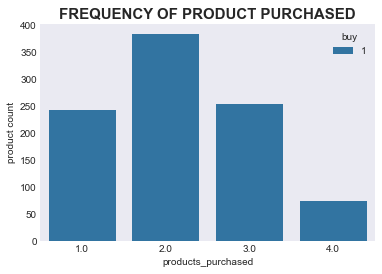

In [19]:
# Visualizing the product count for customers that didn't buy the product
sns.barplot(data=product_count[product_count["buy"]==1], 
            x="products_purchased", 
            y="product count", 
            hue="buy")

plt.title("Frequency of Product Purchased".upper(), size=15, weight="bold");